In [266]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [267]:
#2.6mm wide
#1.9mm verticle
#Taken at 640x480
mmperpix = .004
fps = 1000

In [268]:
n = 4 #Number of epx files
#epx files renamed test0.txt through testn.txt

In [269]:
alldata = np.array([np.delete(np.loadtxt('new' + str(j) +'.txt', unpack=True),0,0) for j in range(n)])
alldata = alldata*mmperpix

In [270]:
alldata = np.array([entry for box in alldata for entry in box])

In [271]:
N = int(len(alldata)/5)

In [272]:
allx = np.array([alldata[5*i] for i in range(N)])
ally = np.array([alldata[1+5*i] for i in range(N)])
allmaj = np.array([alldata[2+5*i] for i in range(N)])

In [273]:
x = np.array([allx[i][0:filterindex(allmaj[i])] for i in range(len(allx))])
y = np.array([ally[i][0:filterindex(allmaj[i])] for i in range(len(ally))])

In [274]:
xavg = np.array([np.mean(entry) for entry in x])
alldy = np.array([np.gradient(entry) for entry in y])
dyavg = -np.array([np.mean(entry) for entry in alldy])
vyavg = dyavg/dt 

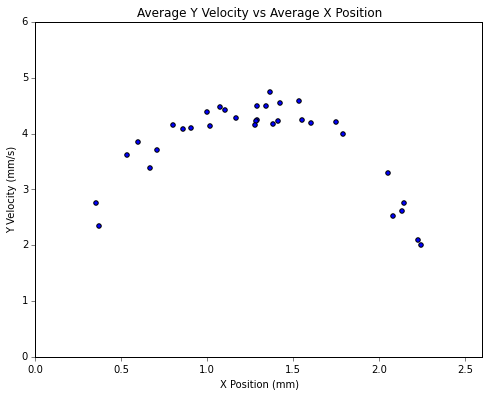

In [275]:
f, ax = plt.subplots(1, 1,figsize=(8,6),sharey=True)
plt.title('Average Y Velocity vs Average X Position');
plt.xlabel('X Position (mm)');
plt.ylabel('Y Velocity (mm/s)');
plt.scatter(xavg, vyavg);
plt.tick_params(axis='x',top='off',direction='out')
plt.tick_params(axis='y',right='off',direction='out')
plt.xlim(0,2.6);
plt.ylim(0,6);

In [65]:
def allarrays(textfile):
    #This loop cycles each text file from tracking program
    data = np.loadtxt(textfile)#This load only serves to find N
    N = int((len(data[0])-1)/5) #I load twice because it is easier to count the number of particles without unpacking 
    data = np.loadtxt(textfile, unpack=True)
    
    #Array of arrays where each sub-array contains the information for a single particle at each frame
    xall = np.array([data[1+5*i] for i in range(N)])
    yall = np.array([data[2+5*i] for i in range(N)])
    majall = np.array([data[3+5*i] for i in range(N)]) #major axis
    return xall,yall,majall

In [255]:
def filterindex(maj):
    z = 0
    for entry in maj:
        if entry<2*maj[0] and entry>.5*maj[0] and entry<400:
            """When the particle tracker loses the particle it creates a very large ellipse where the minor axis is
            about the width of the screen. Also if tracking a small particle that overlaps with a dust spec, sometimes
            the tracker will shrink the size of the ellipse and fit it to the dust. This if statement along with the 
            list slicing below discard any entries in the position arrays after there has been an error in tracking"""
            z = z + 1
    return z

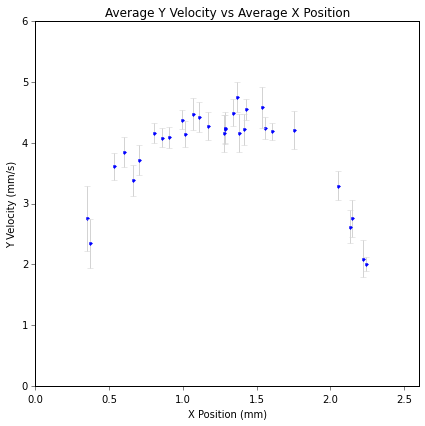

In [250]:
particles = 0
f, ax = plt.subplots(1, 1,figsize=(6,6),sharey=True)

for j in range(n):
    #This loop cycles each text file from tracking program
    data = np.loadtxt('new' + str(j) +'.txt')#This load only serves to find N
    N = int((len(data[0])-1)/5) #I load twice because it is easier to count the number of particles without unpacking 
    data = np.loadtxt('new' + str(j) +'.txt', unpack=True)
    
    #Array of arrays where each sub-array contains the information for a single particle at each frame
    xall = np.array([data[1+5*i] for i in range(N)])
    yall = np.array([data[2+5*i] for i in range(N)])
    majall = np.array([data[3+5*i] for i in range(N)]) #major axis
            

    for i in range(len(xall)):
        
        #Looping through the sub arrays to plot each particle individually
        x = xall[i]*mmperpix
        y = yall[i]*mmperpix
        maj = majall[i]
        
        z = 0
        for entry in maj:
            if entry<2*maj[0] and entry>.5*maj[0] and entry<400:
                """When the particle tracker loses the particle it creates a very large ellipse where the minor axis is
                about the width of the screen. Also if tracking a small particle that overlaps with a dust spec, sometimes
                the tracker will shrink the size of the ellipse and fit it to the dust. This if statement along with the 
                list slicing below discard any entries in the position arrays after there has been an error in tracking"""
                z = z + 1
        x = x[0:z]
        y = y[0:z]
        
        
        if len(y)>=20: #Minimum number of good data entries(frames)(before a tracking error) to qualify for plotting
            frames = len(x)
            seconds = frames/fps
            dy = np.gradient(y)
            dt = 1/fps
            vy = -dy/dt

            
            
            particles = particles + 1
            plt.title('Average Y Velocity vs Average X Position');
            plt.xlabel('X Position (mm)');
            plt.ylabel('Y Velocity (mm/s)');
            plt.errorbar(np.mean(x), np.mean(vy), np.std(vy),fmt='.b', ecolor='lightgray');
            plt.tick_params(axis='x',top='off',direction='out')
            plt.tick_params(axis='y',right='off',direction='out')
            plt.xlim(0,2.6)
            plt.ylim(0,6)
plt.tight_layout()

In [59]:
particles

31

In [ ]:
#         plt.sca(ax[0])
#         plt.title('Y Velocity vs Time');
#         plt.xlabel('Time (s)');
#         plt.ylabel('Y Velocity (mm/s)');
#         plt.plot(time,vy);
#         plt.tick_params(axis='x',top='off',direction='out')
#         plt.tick_params(axis='y',right='off',direction='out')


#         plt.sca(ax[1])
#         plt.title('X Velocity vs Time');
#         plt.xlabel('Time (s)');
#         plt.ylabel('X Velocity (mm/s)');
#         plt.plot(time,vx);
#         plt.tick_params(axis='x',top='off',direction='out')
#         plt.tick_params(axis='y',right='off',direction='out')

#         plt.sca(ax[0])
#         plt.title('Y Velocity vs X Position');
#         plt.xlabel('X Position (mm)');
#         plt.ylabel('Y Velocity (mm/s)');
#         plt.plot(x,vy);
#         plt.tick_params(axis='x',top='off',direction='out')
#         plt.tick_params(axis='y',right='off',direction='out')
#         plt.xlim(0,2.6)

In [276]:
abc = np.array([5,4,3,2,1])
cba = np.sort(abc)

In [277]:
cba

array([1, 2, 3, 4, 5])